In [1]:
import pandas as pd
data = pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [10]:
print(data.shape[0])

768


In [3]:
data_input = data.drop(columns=['Outcome'])
data_input.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [4]:
data_output = data['Outcome']
data_output.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [5]:
from sklearn.model_selection import train_test_split

In [8]:
X,x_test,y,y_test = train_test_split(
    data_input,
    data_output,
    test_size=0.2,
    random_state=1
)
x_train,x_val,y_train,y_val = train_test_split(
    X,
    y,
    test_size=0.33,
    random_state=1
)

In [9]:
#Number of Zero
print(x_train.shape[0])
print(x_val.shape[0])
print(x_test.shape[0])

411
203
154


In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
scaler = StandardScaler()
#Calculate mean and standard division of x_train dataset
scaler.fit(x_train)

StandardScaler()

In [14]:
#Use The Scaled values (Apllied by Z=(X-U)/S )
x_train_scaled = scaler.transform(x_train)

In [15]:
x_val_scaled = scaler.transform(x_val)
x_test_scaled = scaler.transform(x_test)

In [16]:
from sklearn.metrics import accuracy_score

In [27]:
def evaluate_model(clf, x_train, y_train, x_val, y_val):
    clf.fit(x_train, y_train)
    y_pred_train = clf.predict(x_train)
    y_pred_val = clf.predict(x_val)
    acc_train = accuracy_score(y_train, y_pred_train)
    acc_val = accuracy_score(y_val, y_pred_val)
    print(clf.__class__.__name__)  # Display Name of class
    print('Accuracy of Training', acc_train)
    print('Accuracy of Validation', acc_val)
    print('------------------------------')
    return acc_train, acc_val

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [29]:
from sklearn.ensemble import VotingClassifier

In [30]:
tree_clf = DecisionTreeClassifier(random_state=1)
logistic_clf = LogisticRegression(random_state=1)
svc_clf = SVC(random_state=1)

In [31]:
#Parameter of VotingClassifier
estimators = [
    ('tree',tree_clf),
    ('logistic',logistic_clf),
    ('svc',svc_clf)
]
#object of VotingClassifier
voting_clf = VotingClassifier(estimators)

In [32]:
all_estimators = estimators + [('voting_clf',voting_clf)]
all_estimators

[('tree', DecisionTreeClassifier(random_state=1)),
 ('logistic', LogisticRegression(random_state=1)),
 ('svc', SVC(random_state=1)),
 ('voting_clf',
  VotingClassifier(estimators=[('tree', DecisionTreeClassifier(random_state=1)),
                               ('logistic', LogisticRegression(random_state=1)),
                               ('svc', SVC(random_state=1))]))]

In [39]:
results = { 
    'model':[],
    'acc train':[],
    'acc val':[]
}

In [40]:
for (name, clf) in all_estimators:
    acc_train, acc_val = evaluate_model(clf, x_train_scaled, y_train,x_val_scaled, y_val)
    results['model'].append(name)
    results['acc train'].append(acc_train)
    results['acc val'].append(acc_val)

DecisionTreeClassifier
Accuracy of Training 1.0
Accuracy of Validation 0.6748768472906403
------------------------------
LogisticRegression
Accuracy of Training 0.7761557177615572
Accuracy of Validation 0.7733990147783252
------------------------------
SVC
Accuracy of Training 0.8272506082725061
Accuracy of Validation 0.7487684729064039
------------------------------
VotingClassifier
Accuracy of Training 0.8467153284671532
Accuracy of Validation 0.7586206896551724
------------------------------


In [45]:
from sklearn.ensemble import BaggingClassifier

In [46]:
#Bagging/Pasting Classifier
bag_clf = BaggingClassifier(
    LogisticRegression(random_state=1), n_estimators=100, 
    max_samples=0.75, bootstrap=True,
    random_state=1, n_jobs=-1
)


In [47]:
acc_train_bag, acc_val_bag = evaluate_model(bag_clf, x_train_scaled, y_train,x_val_scaled, y_val)

BaggingClassifier
Accuracy of Training 0.7737226277372263
Accuracy of Validation 0.7832512315270936
------------------------------


In [48]:
from sklearn.ensemble import RandomForestClassifier

In [49]:
rf_clf = RandomForestClassifier(n_estimators=500, max_depth=3, random_state=1)
acc_train_rf, acc_val_rf = evaluate_model(rf_clf, x_train_scaled, y_train,x_val_scaled, y_val)

RandomForestClassifier
Accuracy of Training 0.8223844282238443
Accuracy of Validation 0.7389162561576355
------------------------------


In [50]:
from sklearn.ensemble import ExtraTreesClassifier

In [51]:
ex_clf = ExtraTreesClassifier(n_estimators=100, max_depth=4, random_state=1)
acc_train_ex, acc_val_ex = evaluate_model(ex_clf, x_train_scaled, y_train,x_val_scaled, y_val)

ExtraTreesClassifier
Accuracy of Training 0.7566909975669099
Accuracy of Validation 0.7142857142857143
------------------------------


In [53]:
from sklearn.ensemble import AdaBoostClassifier

In [55]:
ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1, min_samples_leaf=50, random_state=1),
    n_estimators=500,
    learning_rate=0.05,
    random_state=1
)
acc_train_ada, acc_val_ada = evaluate_model(ada_clf, x_train_scaled, y_train,x_val_scaled, y_val)

AdaBoostClassifier
Accuracy of Training 0.7883211678832117
Accuracy of Validation 0.7438423645320197
------------------------------


In [57]:
from sklearn.ensemble import GradientBoostingClassifier

In [58]:
gbct_clf = GradientBoostingClassifier(max_depth=1, n_estimators=500, learning_rate=0.05, random_state=1)
acc_train_gbct, acc_val_gbct = evaluate_model(gbct_clf, x_train_scaled, y_train,x_val_scaled, y_val)

GradientBoostingClassifier
Accuracy of Training 0.8272506082725061
Accuracy of Validation 0.7487684729064039
------------------------------


In [60]:
all_results= { 'model':[],
               'acc train':[],
               'acc val':[]
             }
all_results['model']= results['model']+['bagging','rs','ex','ada','gbct']
all_results['acc train']= results['acc train']+[acc_train_bag, acc_train_rf, acc_train_ex,
                                                acc_train_ada, acc_train_gbct]
all_results['acc val']= results['acc val']+[acc_val_bag, acc_val_rf, acc_val_ex,
                                                acc_val_ada, acc_val_gbct]

In [61]:
all_results

{'model': ['tree',
  'logistic',
  'svc',
  'voting_clf',
  'bagging',
  'rs',
  'ex',
  'ada',
  'gbct'],
 'acc train': [1.0,
  0.7761557177615572,
  0.8272506082725061,
  0.8467153284671532,
  0.7737226277372263,
  0.8223844282238443,
  0.7566909975669099,
  0.7883211678832117,
  0.8272506082725061],
 'acc val': [0.6748768472906403,
  0.7733990147783252,
  0.7487684729064039,
  0.7586206896551724,
  0.7832512315270936,
  0.7389162561576355,
  0.7142857142857143,
  0.7438423645320197,
  0.7487684729064039]}

In [64]:
all_results_df = pd.DataFrame(all_results)
all_results_df = all_results_df.sort_values(by='acc val', ascending=False, ignore_index=True)

In [65]:
all_results_df

,model,acc train,acc val
0,bagging,0.773723,0.783251
1,logistic,0.776156,0.773399
2,voting_clf,0.846715,0.758621
3,svc,0.827251,0.748768
4,gbct,0.827251,0.748768
5,ada,0.788321,0.743842
6,rs,0.822384,0.738916
7,ex,0.756691,0.714286
8,tree,1.000000,0.674877


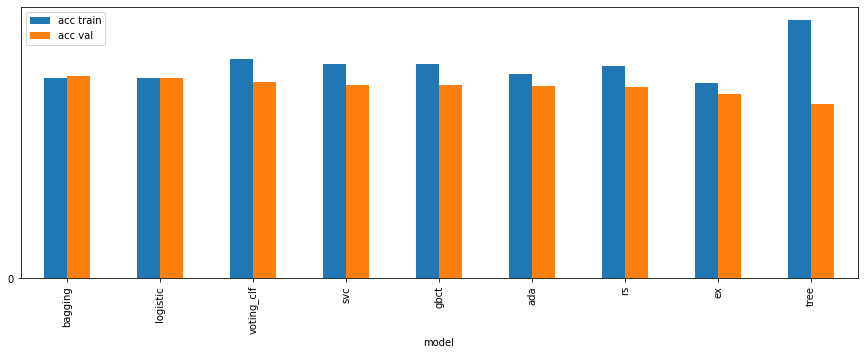

In [70]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
all_results_df.plot.bar(x='model', y=['acc train', 'acc val'], figsize=(15,5))
plt.yticks(np.arange(0.0,0.1))
plt.grid(axis='y')
plt.show()

In [73]:
model_best= BaggingClassifier(
    LogisticRegression(random_state=1),
    n_estimators=100,
    max_samples=0.75,
    bootstrap=True,
    random_state=1,
    n_jobs=-1
)
model_best.fit(x_train_scaled, y_train)

BaggingClassifier(base_estimator=LogisticRegression(random_state=1),
                  max_samples=0.75, n_estimators=100, n_jobs=-1,
                  random_state=1)

In [74]:
y_pred_test = model_best.predict(x_test_scaled)

In [75]:
accuracy_score(y_test, y_pred_test)

0.7922077922077922

In [76]:
import pickle
with open('saved-model.pickle','wb') as f:
    pickle.dump(model_best, f)
with open('scaler.pickle','wb') as f:
    pickle.dump(scaler, f)

In [77]:
with open('saved-model.pickle','rb') as f:
    my_model=pickle.load(f)
with open('scaler.pickle','rb') as f:
    my_scaler=pickle.load(f)

In [78]:
x=[6,148,72,35,0,33.6,0.627,50]

In [79]:
x= np.array(x).reshape(1,-1)

In [80]:
x

array([[  6.   , 148.   ,  72.   ,  35.   ,   0.   ,  33.6  ,   0.627,
         50.   ]])

In [81]:
x_scaled = my_scaler.transform(x)
x_scaled

array([[ 0.62980408,  0.88536382,  0.13920062,  0.9591579 , -0.65505773,
         0.23248757,  0.6157425 ,  1.31527738]])

In [82]:
y = my_model.predict(x_scaled)

In [83]:
y[0]

1